## Heart Disease Disagnostic Analysis

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv(r"D:\Internship\dataSets\10_Heart Disease data\Heart Disease data.csv")

In [30]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [31]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


We have 14 features in Dataset 
1. age: The person's age in years

2. sex: The person's sex (1 male, 0 female)

3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5. chol: The person's cholesterol measurement in mg/dl

6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. restecg: Resting electrocardiographic measurement (0= normal, 1 = having ST-T wave abnormality. 2 = showing probable or definite left ventricular                hypertrophy by Estes' criteria)

8. thalach: The person's maximum heart rate achieved

9. exang: Exercise induced angina (1 = yes: 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest

11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12. ca: The number of major vessels (0-3)
13. thal: A blood disorder called thalassemia (1, 2 or 3)
14. target: 0 or 1

In [32]:
df.shape

(1025, 14)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [34]:
#Checking NULL Values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [35]:
df = df.drop_duplicates()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [36]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Number of People Having Disease

In [37]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

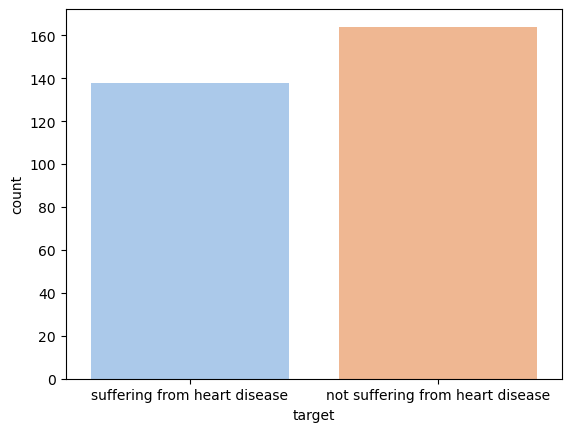

In [38]:
sns.countplot(x='target',data=df,palette='pastel')
plt.xticks([1,0] , ['not suffering from heart disease', 
                    'suffering from heart disease'])
plt.show()

## Distribution of Age Data

<Figure size 1600x600 with 0 Axes>

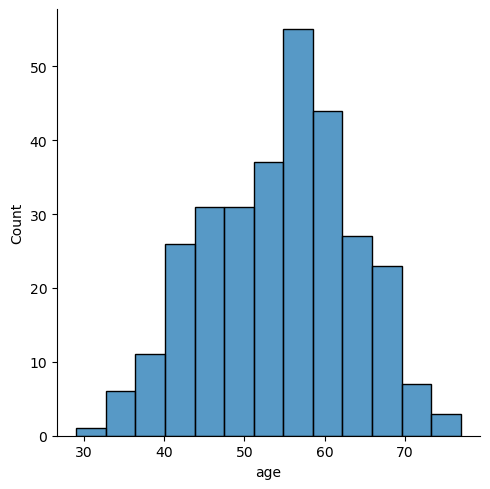

In [39]:
plt.figure(figsize = (16,6))
sns.displot(x = 'age', data = df)
plt.show()

In [40]:
df['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

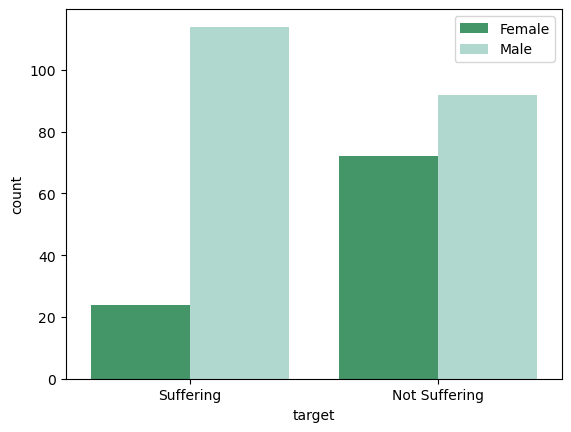

In [41]:
# Presence or Absence of Disease Based on Gender
sns.countplot(x = 'target',data = df,hue = 'sex',palette = 'BuGn_r')
plt.xticks([1,0],['Not Suffering','Suffering'])
plt.legend(labels=['Female','Male'])
plt.show()

We can pbserved from above graph that female suffers less from heart disease as compared to male

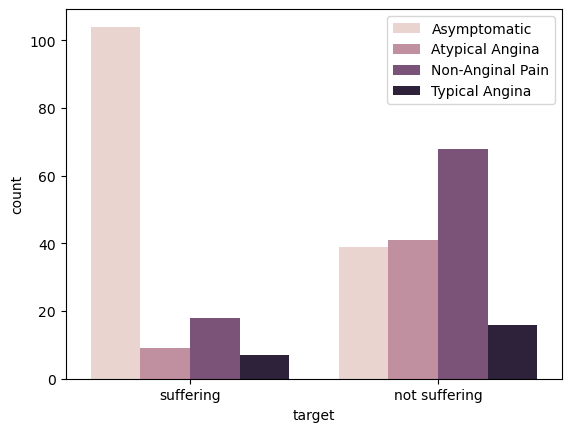

In [42]:
#Disease Based on Chest Pain
sns.countplot(x='target', hue = 'cp', data=df)
plt.xticks([0,1],['suffering','not suffering'])
plt.legend([ 'Asymptomatic','Atypical Angina','Non-Anginal Pain','Typical Angina' ])
plt.show()

We can observe from above graph that people suffering from asyptomatic chest pain are more prone to heart disease. Asymptomatic chest pain neither exhibits nor causes heart disease.

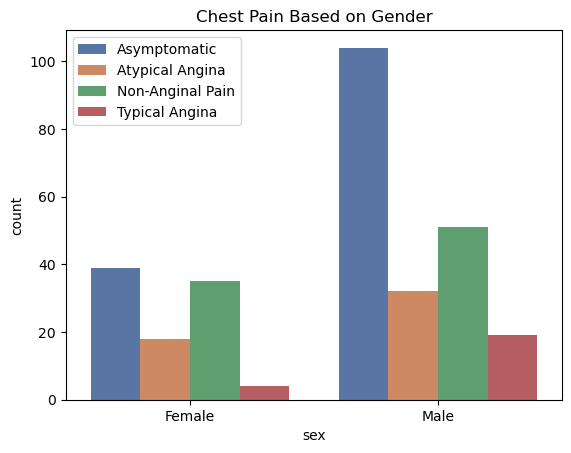

In [43]:
# Chest Pain based on Sex
sns.countplot(x = 'sex', hue = 'cp', data = df, palette = 'deep')
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['Asymptomatic','Atypical Angina',
                   'Non-Anginal Pain','Typical Angina'])
plt.title('Chest Pain Based on Gender')
plt.show()

Here we can observe that Asymptomatic Chest Pain is the most common in Male

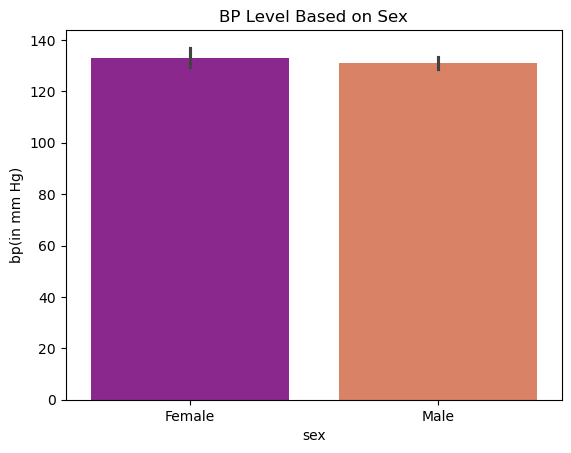

In [44]:
sns.barplot(x = 'sex' , y = 'trestbps', data = df, palette = 'plasma')
plt.xticks([0,1],['Female','Male'])
plt.ylabel('bp(in mm Hg)')
plt.title('BP Level Based on Sex')
plt.show()

Blood Pressure Rate is almost same in Males and Females.

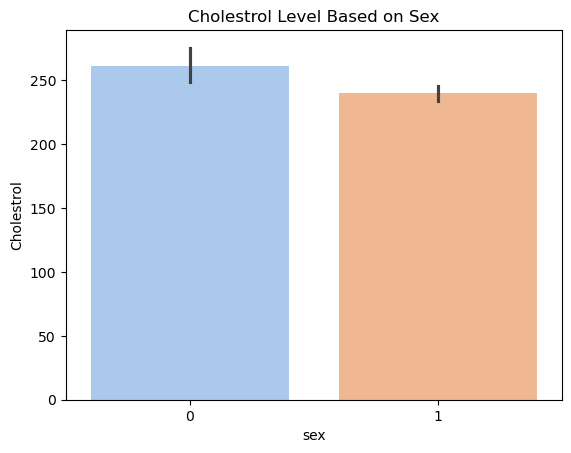

In [45]:
sns.barplot(x='sex',y='chol',data = df, palette = 'pastel')
plt.title('Cholestrol Level Based on Sex')
plt.ylabel('Cholestrol')
plt.show()

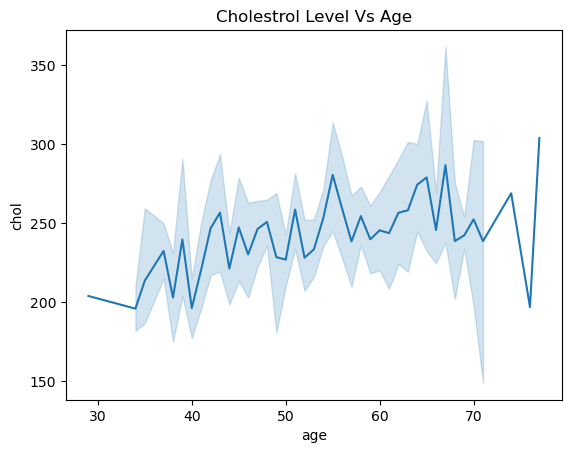

In [46]:
sns.lineplot(x = 'age', y = 'chol', data= df)
plt.title('Cholestrol Level Vs Age')
plt.show()

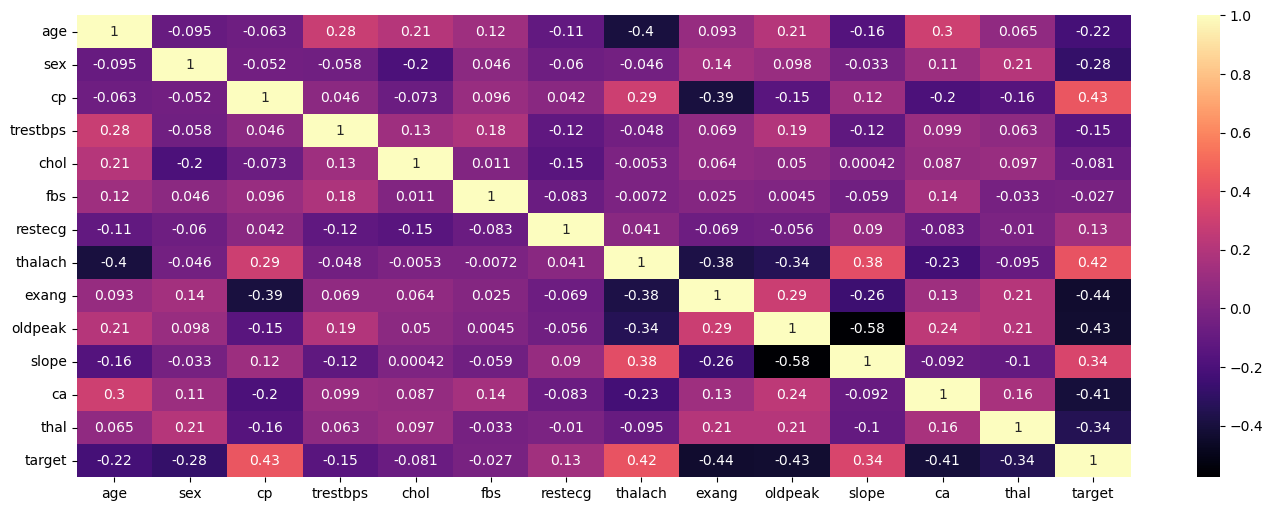

In [47]:
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(),annot=True,cmap='magma')
plt.show()

## Heart Disease Prediction

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [69]:
X = df.drop(columns='target',axis=1)
y= df['target']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [71]:
# Training the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting on Test Data
y_pred = model.predict(X_test)

# Calculating the Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression:", accuracy)

Accuracy of Logistic Regression: 0.8524590163934426


## Exploring Additional Models
Comparing the performance of different models to determine the best approach for predicting heart disease.

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Training the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=10)
rf_model.fit(X_train, y_train)

# Predicting on Test Data
rf_pred = rf_model.predict(X_test)

# Calculating the Accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy of Random Forest:", rf_accuracy)

Accuracy of Random Forest: 0.8032786885245902


In [73]:
from sklearn.svm import SVC

# Training the Support Vector Machine Model
svm_model = SVC(random_state=2,kernel='linear' ,C=1)
svm_model.fit(X_train, y_train)

# Predicting on Test Data
svm_pred = svm_model.predict(X_test)

# Calculating the Accuracy
svm_accuracy = accuracy_score(y_test, svm_pred)
print("Accuracy of Support Vector Machine:", svm_accuracy)

Accuracy of Support Vector Machine: 0.819672131147541


In [74]:
final_data = pd.DataFrame(
    data={
        "Models": ["LR", "RF","SVM",],
        "ACC": [
            accuracy_score(y_true=y_test, y_pred=y_pred),
            accuracy_score(y_true=y_test, y_pred=rf_pred),
            accuracy_score(y_true=y_test, y_pred=svm_pred)
        ]
    }
)
final_data

,Models,ACC
0,LR,0.852459
1,RF,0.803279
2,SVM,0.819672


<Axes: xlabel='Models', ylabel='ACC'>

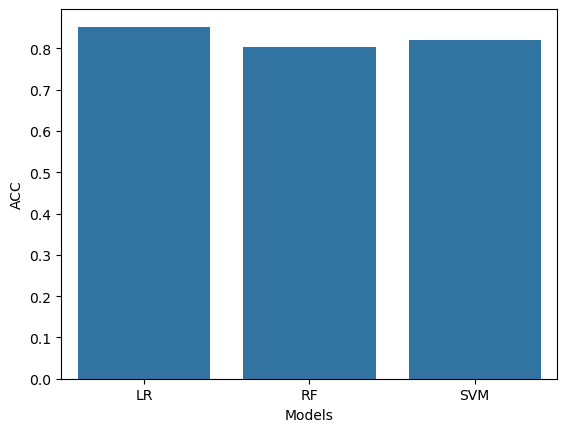

In [75]:
sns.barplot(data=final_data, x="Models", y="ACC")

From above we can clearly see that *Logistic Regression* Model performs best. 